<a href="https://colab.research.google.com/github/ricardoprins/intro-quantum/blob/main/intro-quantum-ptbr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Intro a Computação Quântica e Portas Lógicas Quânticas

Esta palestra é introdutória ao tema de Computação Quântica (originalmente dada para membros do grupo de pesquisa QPower), portanto considera um público com noções consideráveis de matemática, física e programação (você deve saber pelo menos multiplicar matrizes para entender o que vai acontecer aqui). Por essa razão, a abordagem aqui será mais _hands on_, e a linguagem utilizada será o Python.

A discussão não cobrirá o tema de _quantum annealing_, sendo limitada somente a portas lógicas quânticas.
It will just cover gate quantum computation model - there will be no annealing discussed here.

Desse modo, ao cobrir apenas conceitos gerais e portas lógicas quânticas, será mais fácil de estabelecer a distinção e a relação entre a computação clássica e a computação quântica. A palestra utilizará usando Qiskit (pronuncia-se _quískit_), uma biblioteca em _Python_ para computação quântica.

Ainda, para os que não possuem um sólido conhecimento em Python, os auxílios visuais utilizados aqui servirão de suporte para a compreensão dos conceitos abordados.

Para contatos, dúvidas, reclamações e ameaças de morte: ricardoprins@gmail.com

In [6]:
# Instalação do Qiskit
!pip install qiskit

In [49]:
# Inicializações iniciais
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi
from qiskit import *
from qiskit.extensions import Initialize

## Computação e Informação

Toda a teoria por trás de computadores está relacionada à Teoria da Informação. Ambos os campos caminham juntos, unidos e interrelacionados em seu progresso.

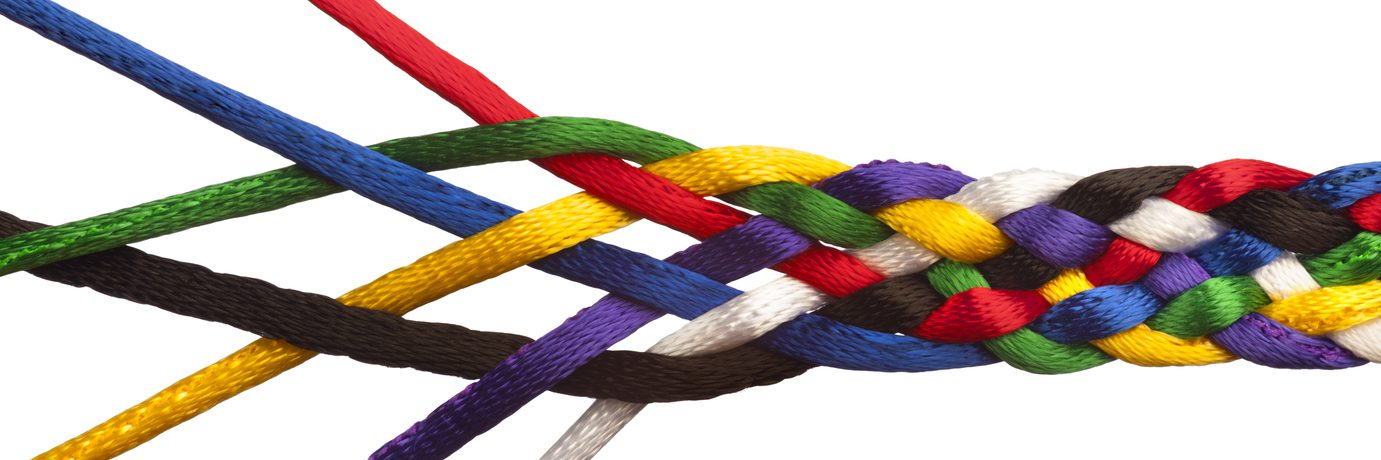

Desse modo, ao falarmos de computação clássica e computação quântica, é preciso começar de um ponto fundamental: ambas tratam de maneiras distintas de *processamento* de informação. Assim, é preciso definir o conceito de _processar_:

$$\text{Entrada } \Longrightarrow \text{ Saída}$$

Quando nós manipulamos qualquer quantidade de informação, e posteriormente a processamos, obtendo informação como resultado desta operação, estamos falando em _processamento_ de informação, ou ainda em _computação_ de informação. Para simplificar, não serão considerados transmissores, receptores e possíveis fontes de ruído: a ideia aqui é somente a de entender o sentido básico de computar ou processar informação em geral.

Essa informação nos ajuda a entender as diferenças fundamentais entre a computação clássica e a computação quântica.

A primeira distinção é na unidade fundamental de informação. Sem perda de generalidade, podemos evitar uma discussão profunda em Teoria de Informação [(clique aqui para saber mais)](http://people.math.harvard.edu/~ctm/home/text/others/shannon/entropy/entropy.pdf), e falar apenas nas unidades fundamentais: _bits_ e _qubits_.

## Bits e Qubits

Um _bit_ é a unidade fundamental de informação da computação clássica. Ela representa uma entidade capaz de armazenar duas posições *estáveis*, como um relé (interruptor). Ligado ou desligado, 0 ou 1, corrente ou ausência de corrente.

Vamos recorrer aqui a uma notação vetorial:

$$1 = \begin{pmatrix} 0\\1 \end{pmatrix}\space e\space\space 0 = \begin{pmatrix} 1\\0 \end{pmatrix} $$

In [8]:
zero = np.matrix('1;0')
um = np.matrix('0;1')

### Quatro operações básicas com bits

Com _bits_,  há quatro operações básicas possíveis:

$$\text{Identidade:}\space\space {f}(x) = x$$<br>
$$\text{Negação:}\space\space {f}(x) = \neg x$$<br>
$$\text{Constante-0:}\space\space {f}(x) = 0$$<br>
$$\text{Constante-1:}\space\space {f}(x) = 1$$<br>

Usando notação matricial:

In [9]:
# Identidade:
identidade = np.matrix('1 0; 0 1')
print('A matriz identidade:')
print(identidade,'\n')

# Zero multiplicado pela matriz identidade retorna zero,
result = identidade @ zero
print(result, '\n')

# e ainda: um, multiplicado pela matriz identidade retorna um, como esperado.
result = identidade @ um
print(result)

A matriz identidade:
[[1 0]
 [0 1]] 

[[1]
 [0]] 

[[0]
 [1]]


In [10]:
# Negação:
neg = np.matrix('0 1; 1 0')
print('A matriz negação:')
print(neg, '\n')

# Zero multiplicado pela matriz negação retorna um,
result = neg @ zero
print(result, '\n')

# e um multiplicado pela matriz negação retorna zero, como esperado.
result = neg @ um
print(result)

A matriz negação:
[[0 1]
 [1 0]] 

[[0]
 [1]] 

[[1]
 [0]]


In [11]:
# Constante-0:
c_zero = np.matrix('1 1; 0 0')
print('A matriz Constante-0')
print(c_zero, '\n')

# Multiplicando zero pela matriz Constante-0 retornará zero,
result = c_zero @ zero
print(result, '\n')

# e multiplicando um pela matriz Constante-0 retornará zero, como esperado.
result = c_zero @ um
print(result)

A matriz Constante-0
[[1 1]
 [0 0]] 

[[1]
 [0]] 

[[1]
 [0]]


In [12]:
# Constante-1:
c_um = np.matrix('0 0; 1 1')
print('A matriz Constante-1:')
print(c_um, '\n')

# Multiplicando zero pela matriz Constante-1 retornará um,
result = c_um @ zero
print(result, '\n')

# e multiplicando um pela matriz Constante-1 retornará um, como esperado.
result = c_um @ um
print(result)

A matriz Constante-1:
[[0 0]
 [1 1]] 

[[0]
 [1]] 

[[0]
 [1]]


### Operações reversíveis com bits

Para nosso propósito aqui, é conveniente definir _operações reversíveis_ como **quaisquer processos** (cf. a definição supracitada de processamento) **que permitam que a entrada seja identificada ao se conhecer a saída e da operação utilizada.**

Nas operações acima, quais são reversíveis e quais não são?

É possível na computação clássica ocorrer operações não-reversíveis, e isso não é um problema.

### Produto Kronecker

Para a compreensão plena dos próximos conceitos, é necessário explicar uma operação que nem sempre é ensinada nas aulas de Álgebra Linear: o produto Kronecker. [(para maiores explicações, clique aqui)](https://www.grc.nasa.gov/www/k-12/Numbers/Math/documents/Tensors_TM2002211716.pdf).

Também é conveniente estudar sobre produtos tensoriais, para maior compreensão, uma vez que produtos Kronecker são um caso particular de produtos tensoriais.

Esses exemplos são satisfatórios para o fim de explicar a operação:<br><br>
$$\begin{pmatrix} x_{0} \\ x_{1} \end{pmatrix} \otimes \begin{pmatrix} y_{0} \\ y_{1} \end{pmatrix} = \begin{pmatrix} x_{0}y_{0} \\ x_{0}y_{1} \\ x_{1}y_{0} \\ x_{1}y_{1} \end{pmatrix} $$


Outro exemplo:<br><br>

$$\begin{pmatrix} x_{0} \\ x_{1} \end{pmatrix} \otimes \begin{pmatrix} y_{0} \\ y_{1} \end{pmatrix} \otimes \begin{pmatrix} z_{0} \\ z_{1} \end{pmatrix} = \begin{pmatrix} x_{0}y_{0}z_{0} \\ x_{0}y_{0}z_{1} \\ x_{0}y_{1}z_{0} \\ x_{0}y_{1}z_{1} \\ x_{1}y_{0}z_{0} \\ x_{1}y_{0}z_{1} \\ x_{1}y_{1}z_{0} \\ x_{1}y_{1}z_{1} \end{pmatrix} $$


### A representação de múltiplos bits

Para representar os estados possíveis de múltiplos bits, utiliza-se o produto Kronecker de vetores de um bit. Novamente é preciso enfatizar que essa é uma explicação simplificada, porém útil o suficiente para a compreensão das operações com múltiplos bits, e suficientemente satisfatória para mostrar o poder da computação quântica.

A representação tensorial de múltiplos bits é chamada de _estado produto_. Essa representação é utilíssima, pois permite a fatoração do _estado produto_ em seus respectivos estados individuais.

Vamos usar como exemplo os estados produto para dois bits:

$$\text{Temos quatro estados possíveis para dois bits:}$$

$$00, 01, 10\space ou\space 11$$:

$$\begin{pmatrix} 1 \\ 0 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} \space\space\text{0 com 0,}$$

$$\begin{pmatrix} 1 \\ 0 \end{pmatrix} \otimes \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix} \space\space\text{0 com 1,}$$

$$\begin{pmatrix} 0 \\ 1 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix} \space\space\text{1 com 0,}$$

$$\begin{pmatrix} 0 \\ 1 \end{pmatrix} \otimes \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix} \space\space\text{e 1 com 1}$$

In [18]:
# usando NumPy:

zero_zero = np.kron(zero, zero) 
zero_um = np.kron(zero, um)
um_zero = np.kron(um, zero)
um_um = np.kron(um, um)
print(zero_zero,'\n\n', zero_um,'\n\n', um_zero,'\n\n', um_um)

[[1]
 [0]
 [0]
 [0]] 

 [[0]
 [1]
 [0]
 [0]] 

 [[0]
 [0]
 [1]
 [0]] 

 [[0]
 [0]
 [0]
 [1]]


Assim, como se pode observar, há quatro _estados produto_ possíveis para um par de bits.

Conclui-se, portanto, que o número de _estados produto_ possíveis em _n_ bytes é igual a $ 2^{n}$.

### CNOT: Uma operação com múltiplos bits

Um dos blocos fundamentais para a computação reversível é a operação CNOT.

A operação CNOT funciona em pares de _bits_; um é designado como _bit controle_ e o outro como _bit alvo_.

O mecanismo de funcionamento dessa _porta_ (daqui em diante, essas operações serão chamadas de _portas_) é o seguinte:

- Se o bit controle for 1, o bit alvo é invertido
- Se o bit controle for 0, o bit alvo segue inalterado
- O bit controle nunca é alterado
- O bit mais significativo (aquele à esquerda) é o bit controle, e o outro, o bit alvo

Exemplo:

In [14]:
cnot = np.matrix('1 0 0 0; 0 1 0 0; 0 0 0 1; 0 0 1 0')
print(cnot)

[[1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]]


In [15]:
# CNOT on 00:
result = cnot @ zero_zero 
print('Como o bit controle é zero, o bit alvo segue sem alteração,\n')
print(result, '\n')

# CNOT on 01
result = cnot @ zero_um
print('o que da mesma maneira acontece aqui.\n')
print(result)

Como o bit controle é zero, o bit alvo segue sem alteração,

[[1]
 [0]
 [0]
 [0]] 

o que da mesma maneira acontece aqui.

[[0]
 [1]
 [0]
 [0]]


In [16]:
# CNOT on 10:
result = cnot @ um_zero 
print('No entanto, ele é invertido neste exemplo,\n')
print(result, '\n')

# CNOT on 11
result = cnot @ um_um
print('tal como no seguinte:\n')
print(result)

No entanto, ele é invertido neste exemplo,

[[0]
 [0]
 [0]
 [1]] 

tal como no seguinte:

[[0]
 [0]
 [1]
 [0]]


### _Qubits_ - as unidades fundamentais de informação quântica

O primeiro ponto a ser mencionado aqui é que todas as operações com _qubits_ DEVEM ser reversíveis (e o são).

Disso decorre que elas são seu próprio inverso - ao aplicar a mesma operação duas vezes em sequência, o valor inicial necessariamente será obtido.

Para os fins deste treinamento, a afirmação acima será tratada de forma axiomática, bem como a seguinte: a mecânica quântica é, além de reversível, unitária. A demonstração disso decorre da equação de Schröddinger.

A única exceção aqui é para as operações/portas de medição, uma vez que estas não são, de fato, operações ou portas.

Ainda que todas as operações acima feitas tenham considerado _bits_, todas elas são *igualmente válidas para _qubits_*. É possível afirmar que os _bits_ vistos em sua forma vetorial são casos particulares de vetores _qubits_.

 **Definição:**<br><br>
 Um qubit pode ser representado por um vetor $\begin{pmatrix} a \\ b \end{pmatrix} : \space a,b \in \mathbb{C}\space\space, \lVert a\rVert^{2} + \lVert b\rVert^{2} = 1$

Exemplos: $\begin{pmatrix} -1 \\ 0 \end{pmatrix}, \begin{pmatrix} \frac12 \\ \frac{\sqrt3}{2} \end{pmatrix}, \begin{pmatrix} \frac{1}{\sqrt2} \\ \frac{1}{\sqrt2} \end{pmatrix}, \begin{pmatrix} \frac{1}{\sqrt2} \\ \frac{-1}{\sqrt2} \end{pmatrix}$

Analogamente aos _bits_, é plausível buscar uma interpretação prática para o comportamento de um _qubit_: ele, tal como seu par da computação clássica, pode representar 0 ou 1 (um par de possibilidades, presença de corrente ou ausência, etc) ou ambos os valores possíveis ao mesmo tempo!


### Superposição quântica - uma explicação matemática

Agora é o momento de encarar as definições físicas mais complicadas relacionadas aos qubits.

Vamos, por um momento, deixar de lado o fato de que um qubit pode assumir ao mesmo tempo os valores 0 e 1, e considerar apenas as questões matemáticas decorrentes dessa característica.

Algo importante também verificável na mecânica quântica é que no momento em que se mede um qubit, ele instantaneamente entrará em colapso para um dos valores, seja 0 ou 1.

Com isso, de maneira igualmente axiomática, afirma-se que a probabilidade que um qubit $\begin{pmatrix} a \\ b  \end{pmatrix}$ tem de _colapsar_ para um valor 0 é  $\lVert a\rVert^{2}$ e para 1, $\lVert b\rVert^{2}$.

Esse axioma facilita a compreensão do comportamento de um sistema com múltiplos qubits.


### Múltiplos qubits

A representação de um sistema com mais de um qubit é análoga à que foi feita para bits clássicos - utiliza-se o produto Kronecker das matrizes de qubits individuais.

In [19]:
## Exemplo com NumPy:

# Partindo do qubit (1/sqrt(2), 1/sqrt(2)):
qubit = np.array([[1/sqrt(2)],[1/sqrt(2)]])

# O estado produto desse qubit é o produto Kronecker dele consigo mesmo:
product_state = np.kron(qubit, qubit)
print(product_state)
# Note que o vetor resultante para o estado produto também é unitário.

[[0.5]
 [0.5]
 [0.5]
 [0.5]]


É possível observar no estado produto acima, que o sistema possui uma probabilidade de 
$\lVert\frac12\rVert^{2}= \frac14 $ (vamos chamar de amplitude) de colapsar nos estados 00, 01, 10 ou 11 após a medição.

## Portas Quânticas (ou ainda, operações com qubits)

Todas as operações descritas acima são aplicáveis a qubits, com a seguinte ressalva: elas devem ser reversíveis.

### Hadamard

_Desse ponto em diante, iniciaremos o uso da biblioteca Qiskit para visualizar também a notação circuito._

A porta Hadamard (H-gate) leva um qubit 0 ou 1 para um estado de superposição _exactly equal_:

$$ H = \begin{pmatrix} \frac1{\sqrt2} \ \frac1{\sqrt2} \\ \frac1{\sqrt2} \ \frac{-1}{\sqrt2} \end{pmatrix}$$

In [20]:
hadamard = np.array([[1/sqrt(2),1/sqrt(2)],[1/sqrt(2),-1/sqrt(2)]])

# Applying Hadamard to qubit 0,
result = hadamard @ zero
print(result, '\n')

# and to qubit 1:
result = hadamard @ um
print(result)

[[0.70710678]
 [0.70710678]] 

[[ 0.70710678]
 [-0.70710678]]


O resultado acima mostra vetores qubit em superposição, com a mesma probabilidade de colapsarem em ambos estados 0 ou 1.

**Pergunta**
O que acontece se aplicarmos a H-gate a um desses qubits resultantes da superposição acima?

### A notação circuito

Uma das notações utilizadas para representar uma sequência de operações com qubits é a notação circuito.

Uma das vantagens da biblioteca Qiskit é a de permitir a visualização das sucessivas operações utilizando essa operação, conforme exemplo abaixo:

In [21]:
def challengeTwo(qc, qubit):
  qc.x(qubit)
  qc.h(qubit)
  qc.x(qubit)
  qc.h(qubit)
  qc.x(qubit)
  return qc



quantum_circuit = QuantumCircuit(1)
initial_state = [1,0]
initializer = Initialize(initial_state)
initializer.label = "init"
challengeTwo(quantum_circuit, 0)
quantum_circuit.draw()


┌───┐┌───┐┌───┐┌───┐┌───┐
q_0: ┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├
     └───┘└───┘└───┘└───┘└───┘

O circuito acima exibe uma sequência de operações realizadas com um qubit em um circuito (duh!), de onde deriva-se o nome _notação circuito_.

Para este caso, partindo de um qubit 0, as operações a seguir são realizadas:


1.   Uma porta negação (chamada de Pauli-X) 
2.   Uma porta Hadamard
3.   Outra Pauli-X 
4.   Outra Hadamard
5.   Mais uma Pauli-X


**Pergunta** Você consegue determinar o resultado da medição do qubit após essas cinco operações?



### Pauli

Para os que possuem familiaridade com álgebra linear, as matrizes Pauli não serão novidade: um conjunto de três matrizes 2x2 que são hermitianas e unitárias.

Começaremos pela Pauli X - carinhosamente chamada de "porta X"


####Pauli X ou porta NOT


$$ X = \begin{pmatrix} 0 \ 1 \\ 1 \ 0 \end{pmatrix}$$

Essa é análoga à matriz negação que utilizamos para operações com bits. Observemos seu comportamento com qubits:

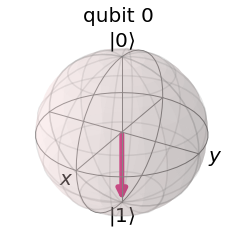

In [28]:
from qiskit.visualization import plot_bloch_multivector

# Vamos desenhar um circuito com um qubit inicializado no estado 0
# e aplicar uma porta X a ele:

qc = QuantumCircuit(1)
qc.x(0)

# A representação abaixo é chamada de Esfera de Bloch, e é usada
# para representar qubits e seus estados. Como podemos ver abaixo,
# esse é o estado em que o qubit "repousa"
# após sua passagem pelo circuito.

def displayBloch():
  backend = Aer.get_backend('statevector_simulator')
  output = execute(qc, backend).result().get_statevector()
  return plot_bloch_multivector(output)

displayBloch()

Como esperado, o estado resultante é 1: 
uma rotação de $\pi$ radianos sobre o eixo _x_ da esfera.

Você também verá essa porta sendo chamada de porta _NOT_.

#### Pauli Y

Análoga à porta X, esta rotaciona um qubit
$\pi$ radianos sobre o eixo _y_ da esfera:

$$ Y = \begin{pmatrix} 0 \ -i \\ i \ 0 \end{pmatrix}$$

In [29]:
# Inicializaremos um qubit no estado 1,
qc = QuantumCircuit(1)
initial_state = [0,1]
qc.initialize(initial_state,0)
qc.draw()

┌─────────────────┐
q_0: ┤ Initialize(0,1) ├
     └─────────────────┘

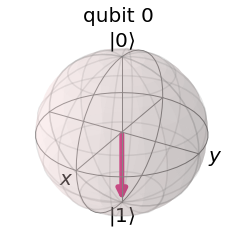

In [30]:
# essa é sua exibição na esfera de Bloch
displayBloch()

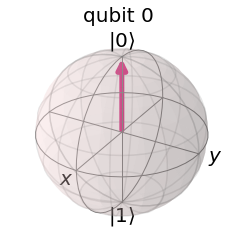

In [31]:
# e, a rotação resultante da Y-gate:
qc.y(0)
displayBloch()

#### Pauli Z

Rotação de $\pi$ radianos sobre o eixo _z_:

$$ Z = \begin{pmatrix} 1 \ 0 \\ 0 \ {-1} \end{pmatrix}$$


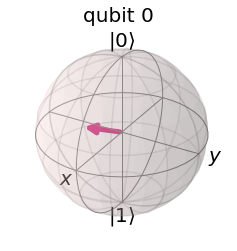

In [53]:
# Inicializamos um qubit cujo ângulo em relação ao eixo z
# possa ser facilmente observável.
initial_state = [sqrt(3)/2,1/2]
qc.initialize(initial_state,0)
displayBloch()

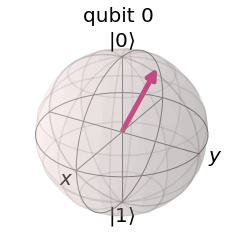

In [54]:
# aplicamos a Z-gate sobre esse qubit, verificando a rotação
qc.z(0)
displayBloch()

### $R_\phi$ (ou $R_z$)

A porta $R_\phi$ é uma porta parametrizada que executa uma rotação de $\phi$ graus sobre o eixo Z:

_Disso pode-se deduzir que a porta Pauli-Z é um caso particular da porta $R_\phi$ com $\phi=\pi$._


$$ R_\phi = \begin{pmatrix} 1 \ 0 \\ 0 \ e^{i\phi} \end{pmatrix} , com \space\space \phi \in \mathbb R $$

### Identidade

A porta I (Identidade) faz exatamente o que seu nome indica: nada.

No entanto, há algumas aplicações práticas para seu uso, as quais fogem ao escopo desta palestra.

### T

A porta T é outro caso particular da porta $R_\phi$, com $\phi = \frac{\pi}{4}$:

$$ T = \begin{pmatrix} 1 \ 0 \\ 0 \ e^{i\frac{\pi}{4}} \end{pmatrix} \text{e } T\dagger = \begin{pmatrix} 1 \ 0 \\ 0 \ e^{-i\frac{\pi}{4}} \end{pmatrix}$$ 

### S

A porta S é ainda outro caso particular da porta $R_\phi$, com $\phi = \frac{\pi}{2}$:

$$ S = \begin{pmatrix} 1 \ 0 \\ 0 \ e^{i\frac{\pi}{2}} \end{pmatrix} \text{and } S\dagger = \begin{pmatrix} 1 \ 0 \\ 0 \ e^{-i\frac{\pi}{2}} \end{pmatrix}$$ 

É conveniente notar que aplicar duas portas S é o mesmo que aplicar uma porta Z, por razões óbvias.

### $U_3$

Todas as portas acima podem ser consideradas como casos particulares da porta $U_3$.

Devido a sua evidente complexidade de exibição, dificilmente ela é utilizada em diagramas.

Uma observação importante: a escolha de rotações nas portas acima sobre o eixo z é apenas uma convenção computacional para facilitar a vida dos programadores e evitar que estes sejam institucionalizados em manicômios.

$$ U_3(\theta,\phi,\lambda) = \begin{pmatrix} \cos(\frac\theta2) \ -e^{i\lambda}\sin(\frac\theta2) \\ e^{i\phi}\sin(\frac\theta2) \ e^{i\phi+i\theta}\cos(\frac\theta2) \end{pmatrix}$$

# OBRIGADO A TODOS!